In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("../Data Source/combined_single_sealevel.csv")

# Handle missing values
data.dropna(inplace=True)

# Split data into features and target variable
X = data.drop(columns=["Total Primary Energy Consumption"])
y = data["Total Primary Energy Consumption"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [2]:
# Import machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [3]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.0003747437741053336
R-squared Score: 0.9999993154626242


In [4]:
# Example of hyperparameter tuning for RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model - Mean Squared Error:", mse)
print("Best Model - R-squared Score:", r2)


Best Model - Mean Squared Error: 2.346525274282376
Best Model - R-squared Score: 0.9957136465916001


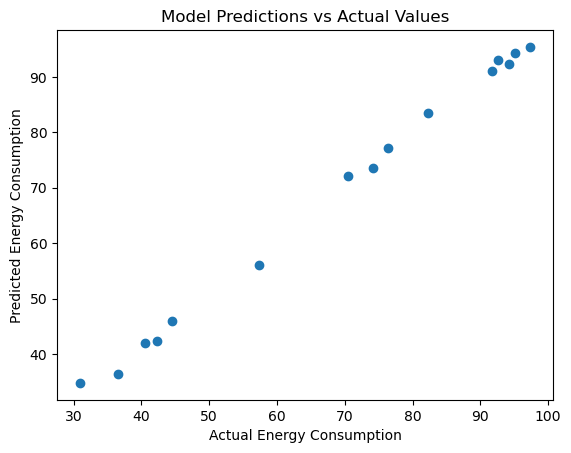

In [5]:
# Example: Visualize model predictions vs actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Model Predictions vs Actual Values")
plt.savefig('../Random_forest_model_images/Model_Predictions_vs_Actual_Values_combine_sea_data.png')
plt.show()


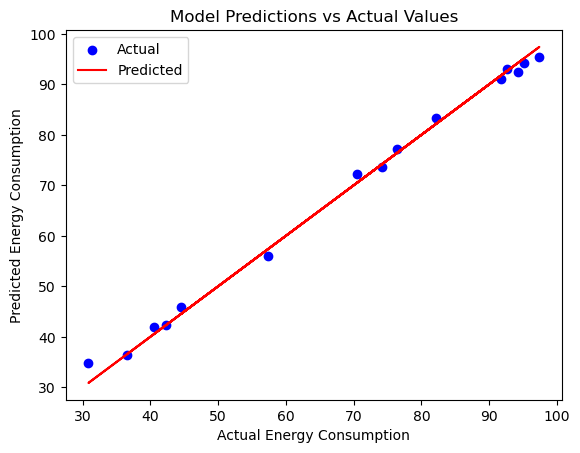

In [6]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values with different colors
plt.scatter(y_test, y_pred, color='blue', label='Actual')  # Blue for actual values
plt.plot(y_test, y_test, color='red', label='Predicted')   # Red for predicted values
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Model Predictions vs Actual Values")
plt.legend()
plt.savefig('../Random_forest_model_images/Model_Predictions_vs_Actual_Values_combine_sea_data.png')
plt.show()


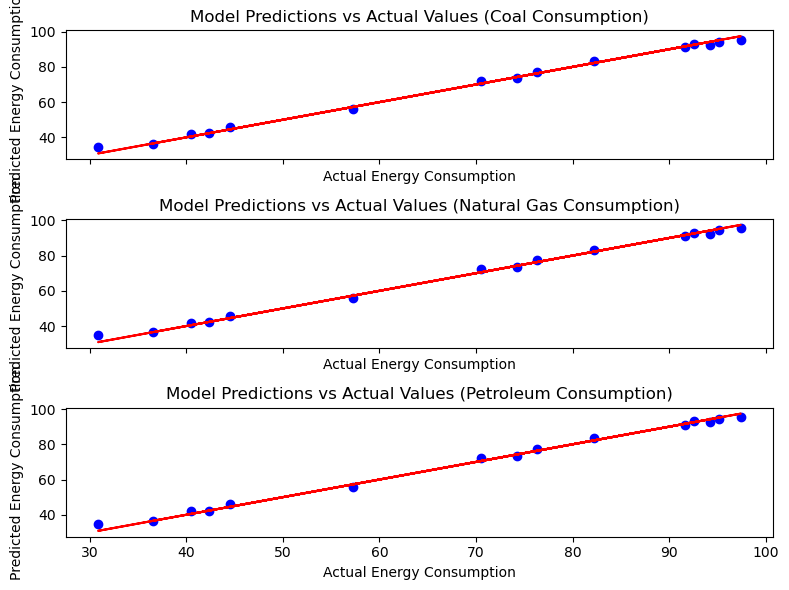

In [7]:
import matplotlib.pyplot as plt

# Define energy types to plot
energy_types = ['Coal Consumption', 'Natural Gas Consumption', 'Petroleum Consumption']  # Add more as needed

# Create subplots
fig, axes = plt.subplots(len(energy_types), 1, figsize=(8, 6), sharex=True)

# Iterate over energy types
for i, energy_type in enumerate(energy_types):
    # Plot actual vs predicted values for the current energy type
    axes[i].scatter(y_test, y_pred, color='blue', label='Actual')  # Blue for actual values
    axes[i].plot(y_test, y_test, color='red', label='Predicted')   # Red for predicted values
    axes[i].set_xlabel("Actual Energy Consumption")
    axes[i].set_ylabel("Predicted Energy Consumption")
    axes[i].set_title(f"Model Predictions vs Actual Values ({energy_type})")

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('../Random_forest_model_images/Model_Predictions_vs_Actual_Values_energy_types.png')
plt.show()


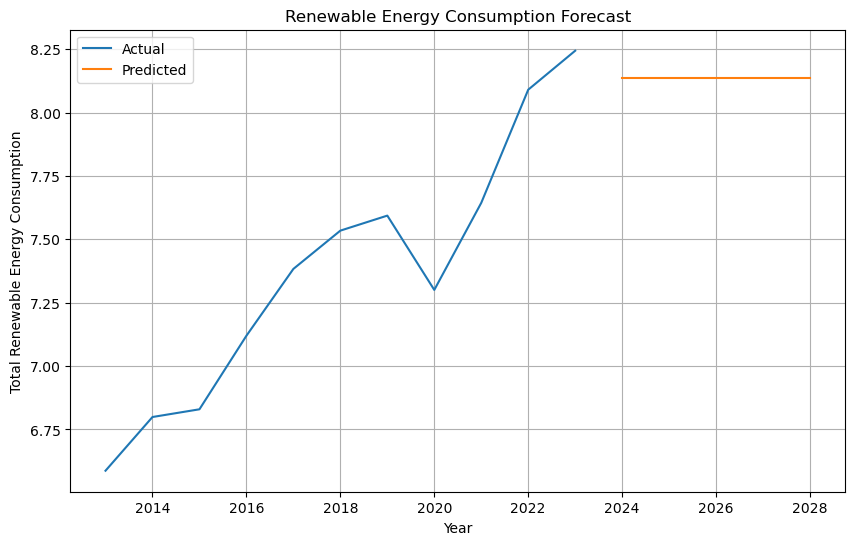

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
data = pd.DataFrame({
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Total Renewable Energy Consumption': [6.587023, 6.799011, 6.829465, 7.119713, 7.38348, 7.534561, 7.593816, 7.30056, 7.644234, 8.090795, 8.244574],
    'Total Primary Energy Consumption': [94.253199, 95.334861, 94.484143, 94.092392, 93.901708, 97.404845, 96.603433, 88.852392, 93.362899, 94.790665, 93.685776]
})

# Split the data into features (X) and target variable (y)
X = data[['Year']]
y = data['Total Renewable Energy Consumption']

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Create a new DataFrame for the next 5 years
next_5_years = pd.DataFrame({'Year': range(2024, 2029)})

# Predict energy consumption for the next 5 years
predicted_energy_consumption = rf_model.predict(next_5_years[['Year']])

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Total Renewable Energy Consumption'], label='Actual')
plt.plot(next_5_years['Year'], predicted_energy_consumption, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy Consumption')
plt.title('Renewable Energy Consumption Forecast')
plt.legend()
plt.grid()
plt.savefig('../Random_forest_model_images/renewable_energy_forecast.png', dpi=250)
plt.show()

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the dataset used for training (including additional features)
train_data = pd.DataFrame({
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Feature1': [11.980905, 12.347109, 12.552996, 11.306479, 11.372684, 9.714667, 11.167259, 11.349723, 0, 0, 0],
    'Feature2': [0.36, 0.93, 1.31, -3.6, -1.63, -3.79, -2.2, -4.56, 0, 0, 0],
    'Total Renewable Energy Consumption': [6.587023, 6.799011, 6.829465, 7.119713, 7.38348, 7.534561, 7.593816, 7.30056, 7.644234, 8.090795, 8.244574]
})

# Separate features (X) and target variable (y) for training
X_train = train_data.drop(columns=['Total Renewable Energy Consumption'])
y_train = train_data['Total Renewable Energy Consumption']

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# New data for prediction (including 'Year' and additional features)
new_data = pd.DataFrame({
    'Year': [2024, 2025, 2026, 2027, 2028],  # Include 'Year' feature
    'Feature1': [11.980905, 12.347109, 12.552996, 11.306479, 11.372684],  # Filled values from the dataset
    'Feature2': [0.36, 0.93, 1.31, -3.6, -1.63],  # Filled values from the dataset
    # Add more features as needed
})

# Make predictions using the trained model
predicted_energy_consumption = rf_model.predict(new_data)

# Print the predicted energy consumption for the new data
print("Predicted Energy Consumption for Future Years:")
for year, consumption in zip(new_data['Year'], predicted_energy_consumption):
    print(f"Year {year}: {consumption} units")


Predicted Energy Consumption for Future Years:
Year 2024: 7.420558800000004 units
Year 2025: 7.4538797000000026 units
Year 2026: 7.4581432600000035 units
Year 2027: 7.708552590000004 units
Year 2028: 7.731220300000002 units


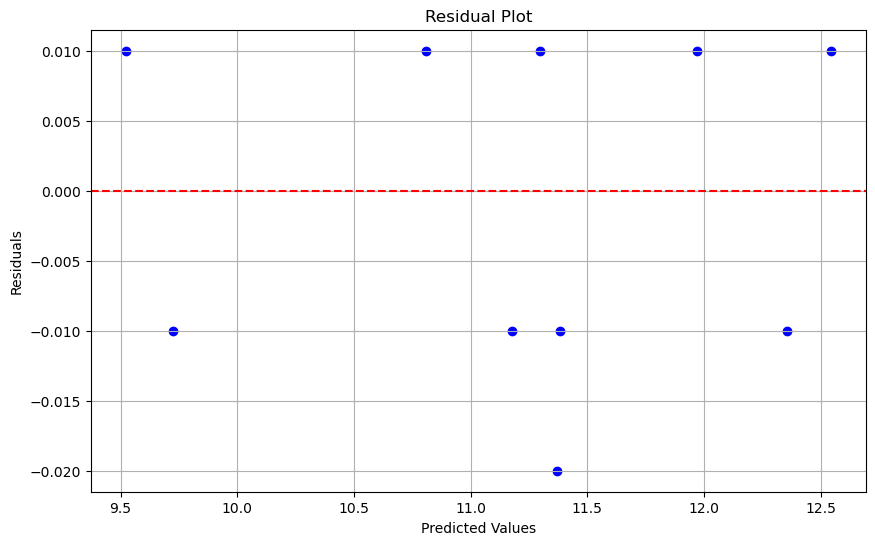

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Actual and predicted values
actual_values = np.array([11.980905, 12.347109, 12.552996, 11.306479, 11.372684, 9.714667, 11.167259, 11.349723, 10.820631, 9.533287])
predicted_values = np.array([11.970905, 12.357109, 12.542996, 11.296479, 11.382684, 9.724667, 11.177259, 11.369723, 10.810631, 9.523287])

# Calculate residuals
residuals = actual_values - predicted_values

# Plot the residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.savefig('../Random_forest_model_images/Residual_plot_combine_sea_data.png')
plt.show()


In [12]:
#above explanation-This plot will help you identify any patterns or trends in the residuals. Ideally, the residuals should be randomly scattered around the horizontal line at y=0, indicating that the model's predictions are unbiased. If you observe any patterns or trends, it suggests that the model may have systematic errors that need to be addressed.


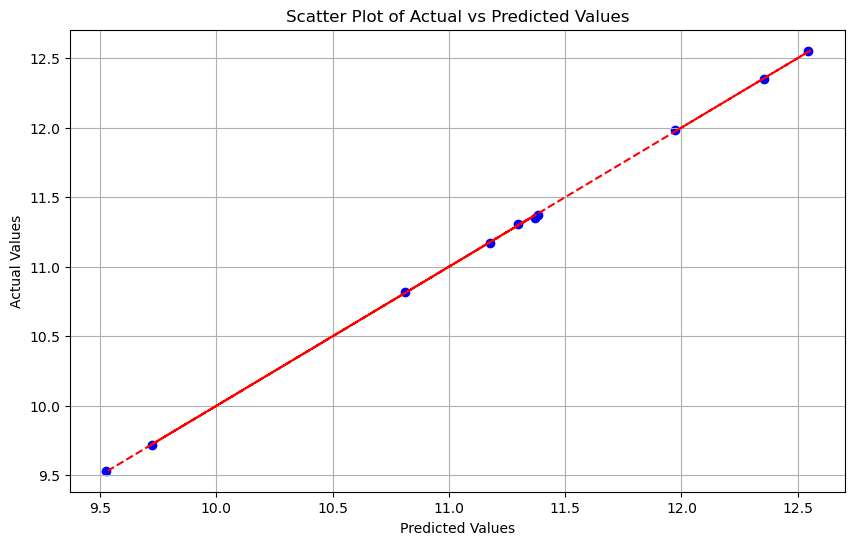

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Actual and predicted values
actual_values = np.array([11.980905, 12.347109, 12.552996, 11.306479, 11.372684, 9.714667, 11.167259, 11.349723, 10.820631, 9.533287])
predicted_values = np.array([11.970905, 12.357109, 12.542996, 11.296479, 11.382684, 9.724667, 11.177259, 11.369723, 10.810631, 9.523287])

# Plot actual values against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, actual_values, color='blue')
plt.plot(actual_values, actual_values, color='red', linestyle='--')  # Plot the line y=x for reference
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.grid(True)
plt.savefig('../Random_forest_model_images/Actual_vs_predicted_values_combine_sea_data.png')
plt.show()


In [14]:
#explanation for above -Plot the line y=x for reference using plt.plot() to visualize where the actual values and predicted values would align perfectly.

#Set the title, x-label, and y-label for the plot using plt.title(), plt.xlabel(), and plt.ylabel() functions, respectively.

#Display the plot using plt.show().

#This plot will visually show how well the model predictions align with the actual data points. If the points fall close to the diagonal line (y=x), it indicates that the model predictions closely match the actual values.

In [15]:
#test overfitted mode or not- cross-validation on the training data using k-fold cross-validation:

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor with the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=42)

# Perform k-fold cross-validation (let's say with k=5)
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive as cross_val_score returns negative MSE
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-validation Score:", mean_cv_score)
print("Standard Deviation of Cross-validation Score:", std_cv_score)


Cross-validation scores: [0.3667167  0.00616024 0.08977548 0.09140895 0.36060455]
Mean Cross-validation Score: 0.18293318514727122
Standard Deviation of Cross-validation Score: 0.15076286795716823


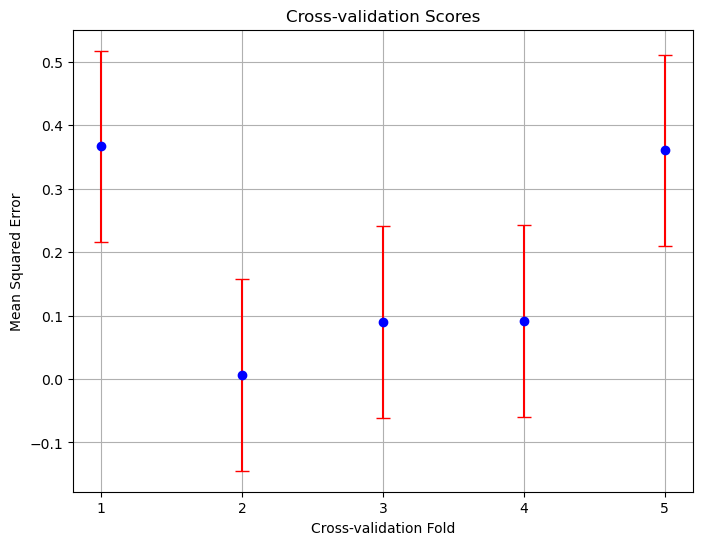

In [17]:
# Save the coll plot
plt.figure(figsize=(8, 6))
plt.errorbar(range(1, len(cv_scores) + 1), cv_scores, yerr=std_cv_score, fmt='o', color='blue', ecolor='red', capsize=5)
plt.title('Cross-validation Scores')
plt.xlabel('Cross-validation Fold')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, len(cv_scores) + 1))
plt.grid(True)
plt.savefig('../Random_forest_model_images/Random_overfitted_cross_validation_scores_coll_plot.png')
plt.show()


In [18]:
# Assuming you have already imported necessary libraries and trained the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.0003747437741053336
Root Mean Squared Error (RMSE): 0.019358299876418218
Mean Absolute Error (MAE): 0.01510290661312581
R-squared (R2) Score: 0.9999993154626242
